In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import numpy as np

In [7]:
proj_path = "/Users/steeve_laquitaine/desktop/CodeHub/intent/intent/"
train_data_path = proj_path + "data/01_raw/banking77/train.csv"
test_data_path = proj_path + "data/01_raw/banking77/test.csv"

In [8]:
train_data  = pd.read_csv(train_data_path)

In [9]:
# preview
train_data.head(5)

,text,category
0,I am still waiting on my card?,card_arrival
1,What can I do if my card still hasn't arrived ...,card_arrival
2,I have been waiting over a week. Is the card s...,card_arrival
3,Can I track my card while it is in the process...,card_arrival
4,"How do I know if I will get my card, or if it ...",card_arrival


In [10]:
print('{} unique labels'.format(train_data.category.nunique()))
print(train_data.category.unique())

77 unique labels
['card_arrival' 'card_linking' 'exchange_rate'
 'card_payment_wrong_exchange_rate' 'extra_charge_on_statement'
 'pending_cash_withdrawal' 'fiat_currency_support'
 'card_delivery_estimate' 'automatic_top_up' 'card_not_working'
 'exchange_via_app' 'lost_or_stolen_card' 'age_limit' 'pin_blocked'
 'contactless_not_working' 'top_up_by_bank_transfer_charge'
 'pending_top_up' 'cancel_transfer' 'top_up_limits'
 'wrong_amount_of_cash_received' 'card_payment_fee_charged'
 'transfer_not_received_by_recipient' 'supported_cards_and_currencies'
 'getting_virtual_card' 'card_acceptance' 'top_up_reverted'
 'balance_not_updated_after_cheque_or_cash_deposit'
 'card_payment_not_recognised' 'edit_personal_details'
 'why_verify_identity' 'unable_to_verify_identity' 'get_physical_card'
 'visa_or_mastercard' 'topping_up_by_card' 'disposable_card_limits'
 'compromised_card' 'atm_support' 'direct_debit_payment_not_recognised'
 'passcode_forgotten' 'declined_cash_withdrawal' 'pending_card_payme

Took 0.24 secs


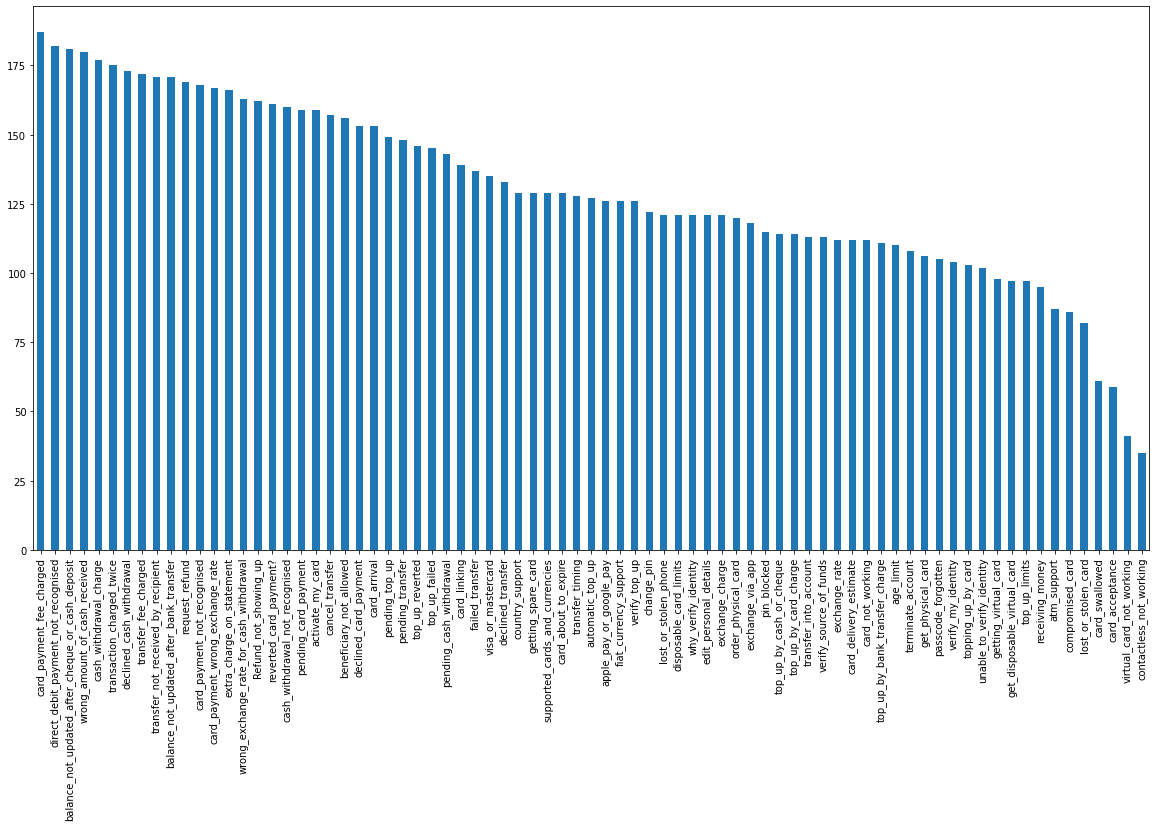

In [69]:
# train_data.plot.barh(y="category")
# train_data.category.hist()
tic = time.time()
plt.figure(figsize=(20,10))
train_data['category'].value_counts().plot(kind='bar');
print('Took {} secs'.format(np.round(time.time()-tic,2)))

In [92]:
# list labels sorted by occurrence frequency
train_data['category'].value_counts().index

Index(['card_payment_fee_charged', 'direct_debit_payment_not_recognised',
       'balance_not_updated_after_cheque_or_cash_deposit',
       'wrong_amount_of_cash_received', 'cash_withdrawal_charge',
       'transaction_charged_twice', 'declined_cash_withdrawal',
       'transfer_fee_charged', 'transfer_not_received_by_recipient',
       'balance_not_updated_after_bank_transfer', 'request_refund',
       'card_payment_not_recognised', 'card_payment_wrong_exchange_rate',
       'extra_charge_on_statement', 'wrong_exchange_rate_for_cash_withdrawal',
       'Refund_not_showing_up', 'reverted_card_payment?',
       'cash_withdrawal_not_recognised', 'pending_card_payment',
       'activate_my_card', 'cancel_transfer', 'beneficiary_not_allowed',
       'declined_card_payment', 'card_arrival', 'pending_top_up',
       'pending_transfer', 'top_up_reverted', 'top_up_failed',
       'pending_cash_withdrawal', 'card_linking', 'failed_transfer',
       'visa_or_mastercard', 'declined_transfer', 'co

In [105]:
help(train_data.filter)

Help on method filter in module pandas.core.generic:

filter(items=None, like:Union[str, NoneType]=None, regex:Union[str, NoneType]=None, axis=None) -> ~FrameOrSeries method of pandas.core.frame.DataFrame instance
    Subset the dataframe rows or columns according to the specified index labels.
    
    Note that this routine does not filter a dataframe on its
    contents. The filter is applied to the labels of the index.
    
    Parameters
    ----------
    items : list-like
        Keep labels from axis which are in items.
    like : str
        Keep labels from axis for which "like in label == True".
    regex : str (regular expression)
        Keep labels from axis for which re.search(regex, label) == True.
    axis : {0 or ‘index’, 1 or ‘columns’, None}, default None
        The axis to filter on, expressed either as an index (int)
        or axis name (str). By default this is the info axis,
        'index' for Series, 'columns' for DataFrame.
    
    Returns
    -------
    

In [119]:
# focus on the requests for the top label (most frequent)
train_data.text.loc[train_data["category"]=="card_payment_fee_charged"]

2511    There was a fee charged when I paid with my card.
2512                  I received a fee I should not have.
2513          Why am I being a charged for using my card?
2514       Tell me why there is a fee for a card payment.
2515    I don't understand why I'm being charged for u...
                              ...                        
2693    Why am I charged a fee for using my card on so...
2694    Why am I being charged a fee for using my card...
2695    How can I tell if there will be a fee added to...
2696    You promised no fees but now I've got one. Wha...
2697    How do I know which payments I make will have ...
Name: text, Length: 187, dtype: object

In [96]:
help(train_data.where)

Help on method where in module pandas.core.generic:

where(cond, other=nan, inplace=False, axis=None, level=None, errors='raise', try_cast=False) method of pandas.core.frame.DataFrame instance
    Replace values where the condition is False.
    
    Parameters
    ----------
    cond : bool Series/DataFrame, array-like, or callable
        Where `cond` is True, keep the original value. Where
        False, replace with corresponding value from `other`.
        If `cond` is callable, it is computed on the Series/DataFrame and
        should return boolean Series/DataFrame or array. The callable must
        not change input Series/DataFrame (though pandas doesn't check it).
    other : scalar, Series/DataFrame, or callable
        Entries where `cond` is False are replaced with
        corresponding value from `other`.
        If other is callable, it is computed on the Series/DataFrame and
        should return scalar or Series/DataFrame. The callable must not
        change input Ser

Help on AxesSubplot in module matplotlib.axes._subplots object:

class AxesSubplot(SubplotBase, matplotlib.axes._axes.Axes)
 |  Base class for subplots, which are :class:`Axes` instances with
 |  additional methods to facilitate generating and manipulating a set
 |  of :class:`Axes` within a figure.
 |  
 |  Method resolution order:
 |      AxesSubplot
 |      SubplotBase
 |      matplotlib.axes._axes.Axes
 |      matplotlib.axes._base._AxesBase
 |      matplotlib.artist.Artist
 |      builtins.object
 |  
 |  Methods inherited from SubplotBase:
 |  
 |  __init__(self, fig, *args, **kwargs)
 |      Parameters
 |      ----------
 |      fig : `matplotlib.figure.Figure`
 |      
 |      *args : tuple (*nrows*, *ncols*, *index*) or int
 |          The array of subplots in the figure has dimensions ``(nrows,
 |          ncols)``, and *index* is the index of the subplot being created.
 |          *index* starts at 1 in the upper left corner and increases to the
 |          right.
 |      
 

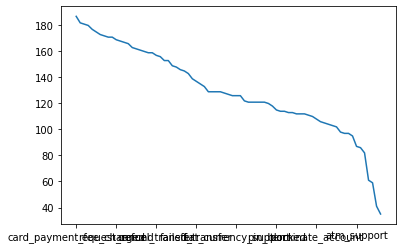

In [34]:
help(train_data['category'].value_counts().plot())